In [1]:
import pandas as pd
import numpy as np
import spacy
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
%matplotlib inline

In [3]:
train_full_df = pd.read_csv('train.csv')
train_full_df['text_data'] = train_full_df["Review Title"] + '. ' + train_full_df["Review Text"]
train_full_df['text_data'] = train_full_df['text_data'].str.replace(r'<.*?>', '').str.lower()

## Class Imbalance
Lets look how many exmples each class has.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

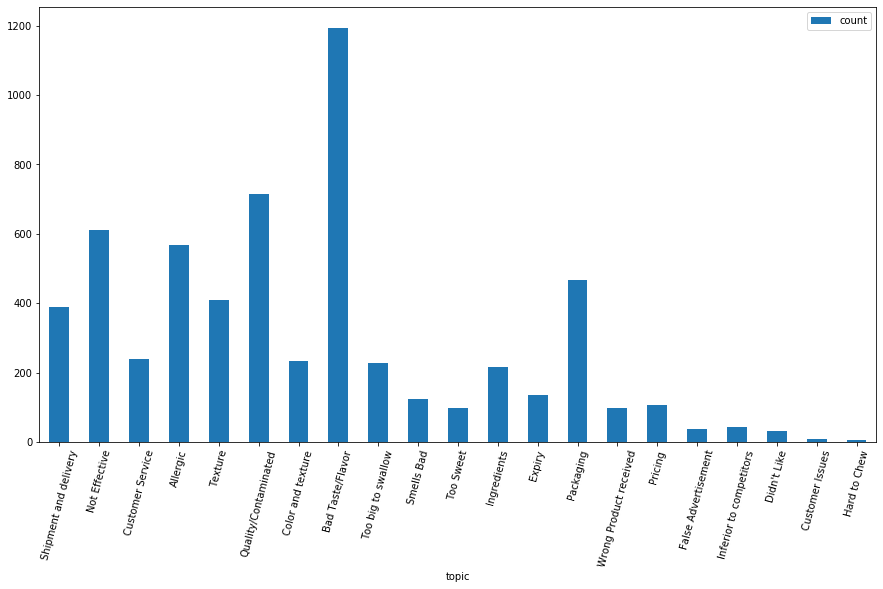

In [4]:
topics_counter = Counter(train_full_df.topic.tolist())

topic_df = pd.DataFrame(topics_counter.items(), columns=["topic", "count"])

topic_df.plot(x='topic', y='count', kind='bar', figsize=(15,8))
plt.xticks(rotation=75)

From above plot we can clearly see that most of expamples have issue related to packing, shipment and delivery, Effectiveness of product, Quality and Taste
And there are very few customer specific or pricing related issue. So we should mainly focus on packing, shipment and quality of product.

## Word Cloud by Category

Lets look at most frequest words appeared in each topic with WORDCLOUD PLOT

In [5]:
unique_topics = train_full_df.topic.unique()

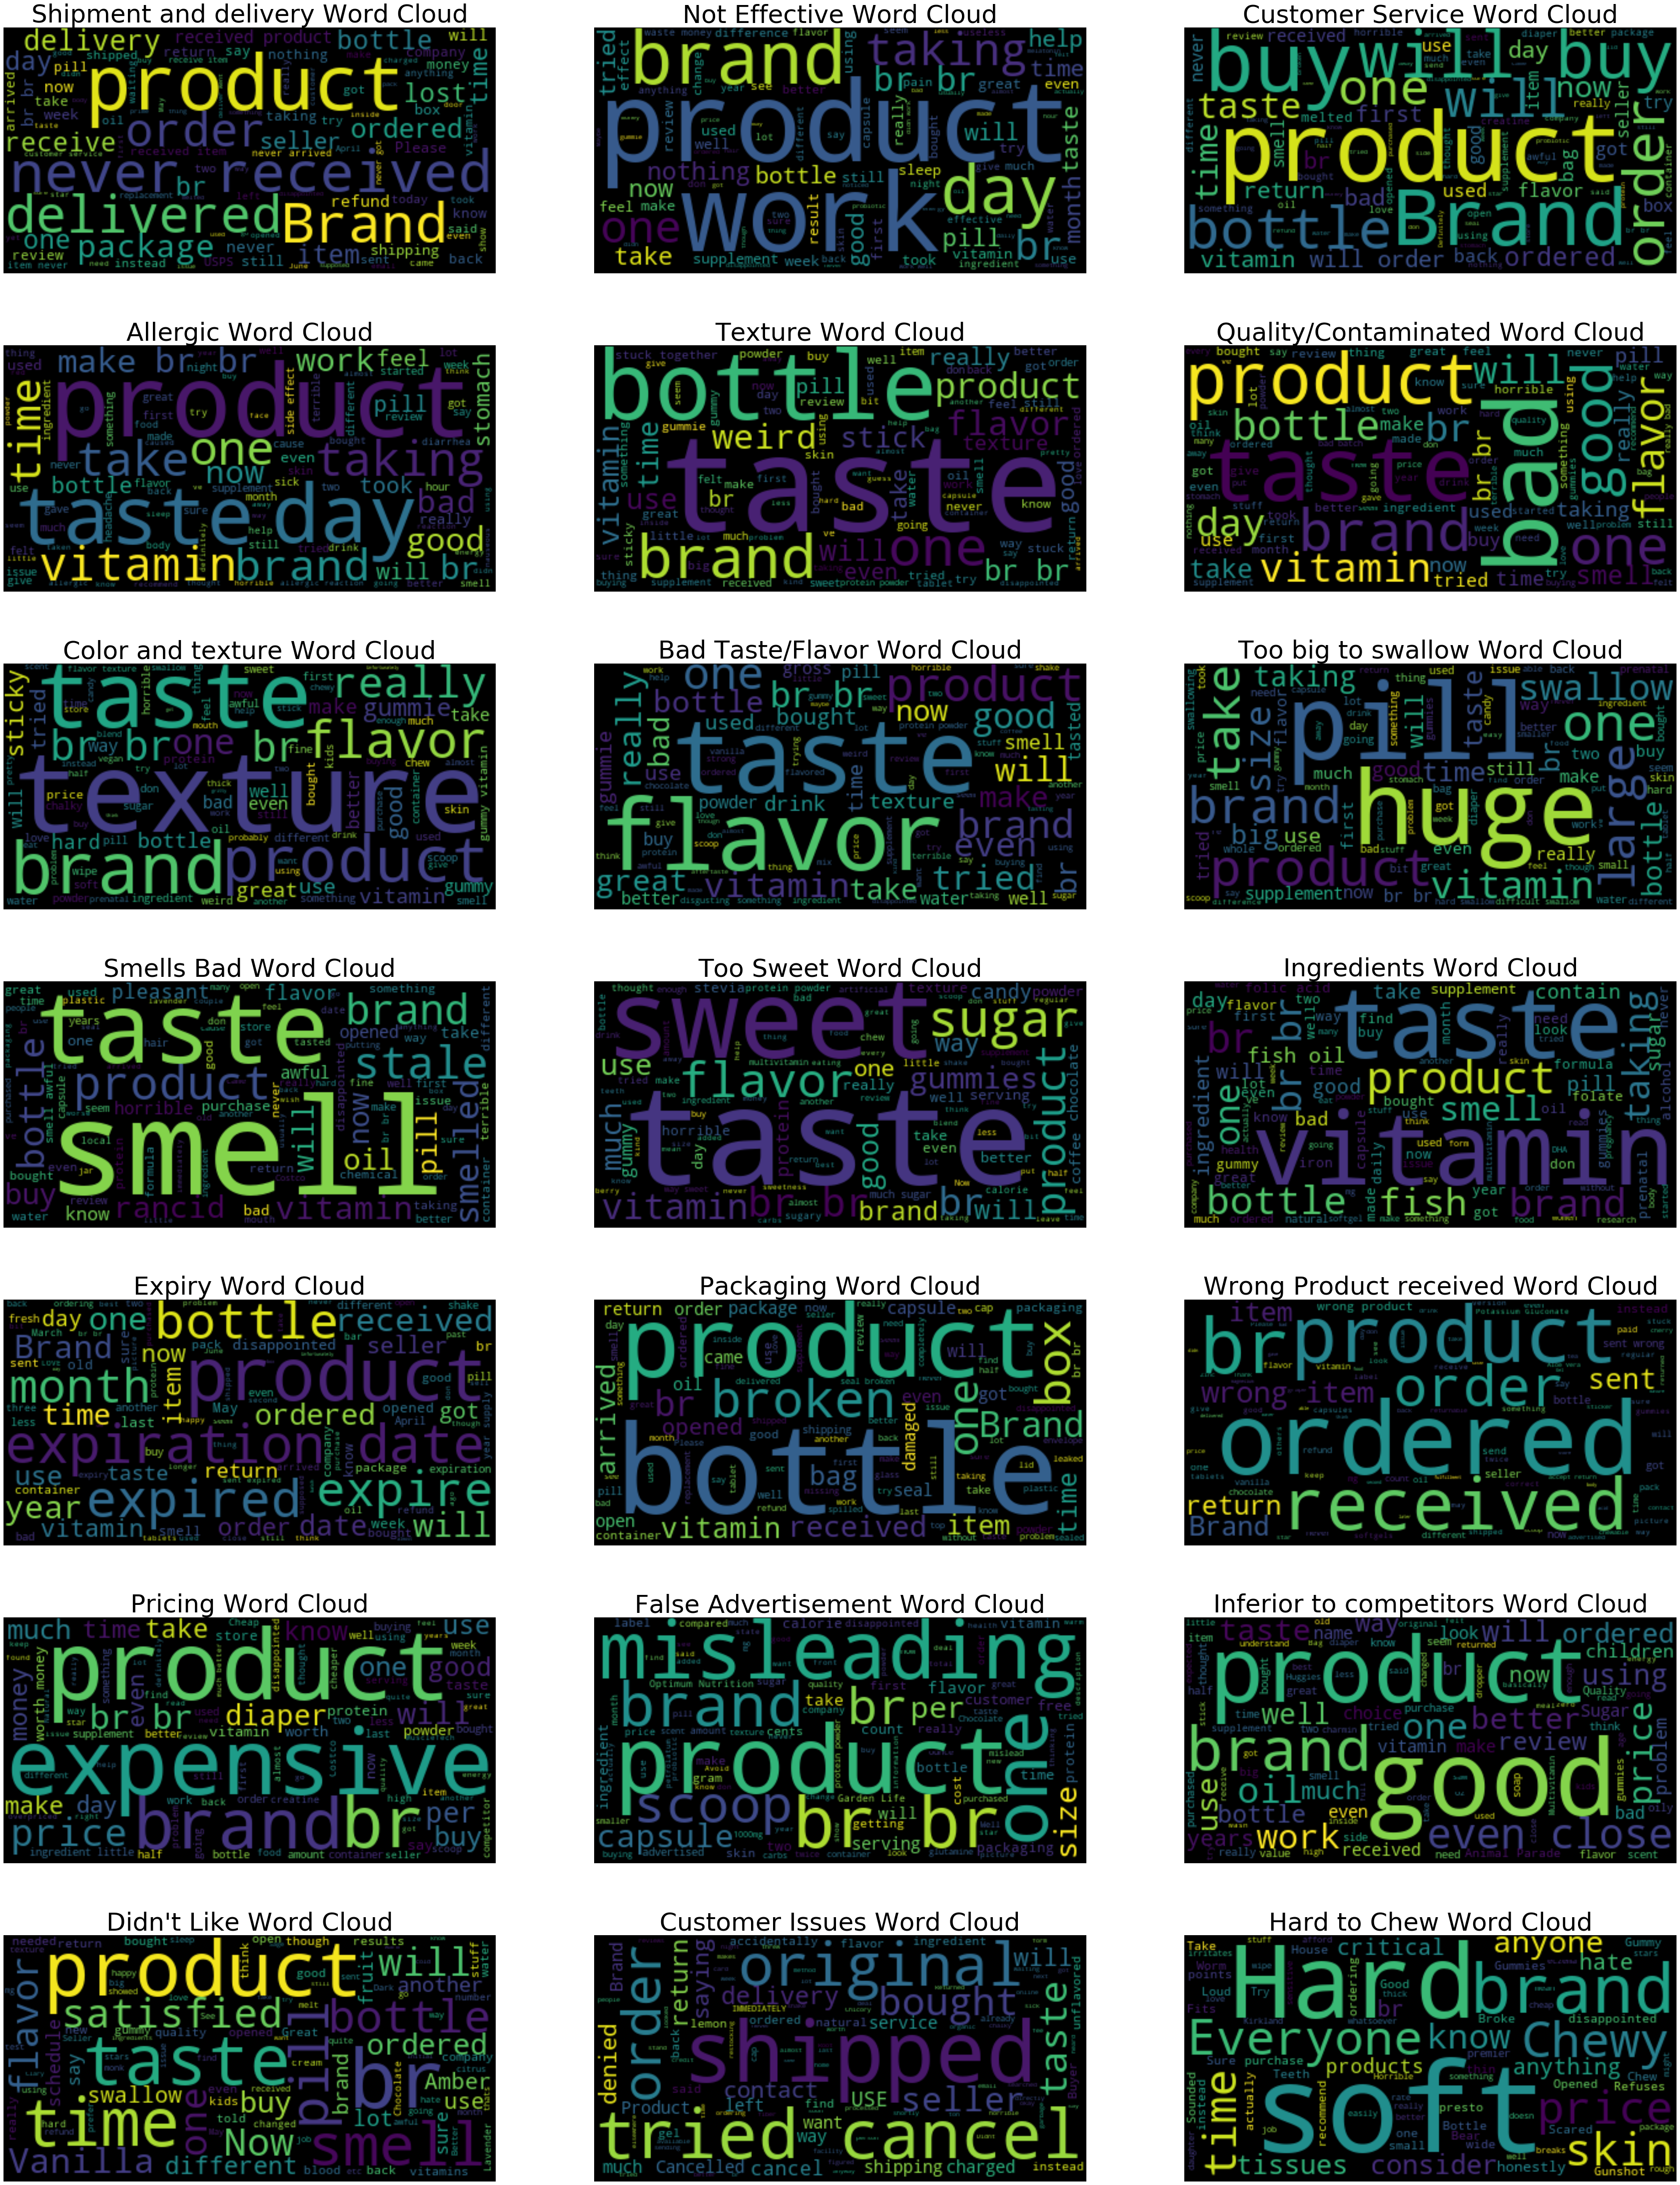

In [6]:
plt.figure(figsize=(60,80))
for i in range(len(unique_topics)):
    plt.subplot(7, 3, i+1)
    reviews_list = train_full_df.loc[train_full_df.topic==unique_topics[i]]["Review Text"].tolist()
    wcd = WordCloud(stopwords=STOPWORDS, max_words=100)
    wordcloud = wcd.generate('. '.join(reviews_list))
    plt.title(f"{unique_topics[i]} Word Cloud", fontsize=50)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.show()

## TOP 10 Words in Each Topic

Lets find out Top 10 words appeared in each topic with the help of TF-IDF

In [7]:
def custom_tokenizer(text):
    tokens = word_tokenize(text)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

In [8]:
tfidf_vector = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1,2), max_df=0.8, min_df=3, strip_accents='unicode', sublinear_tf=True)
train_tfidf = tfidf_vector.fit_transform(train_full_df["text_data"].tolist())

In [9]:
features = tfidf_vector.get_feature_names()
train_tfidf = train_tfidf.toarray()

In [10]:
for i in unique_topics:
    top_words = train_tfidf[train_full_df.loc[train_full_df.topic==i].index].mean(axis=0).argsort()[::-1][:10]
    print(f"TOP 10 word appeared in {i}\n\t{', '.join([features[x] for x in top_words])}\n")

TOP 10 word appeared in Shipment and delivery
	never, received, never received, receive, delivered, product, item, delivery, order, received product

TOP 10 word appeared in Not Effective
	work, nt, nt work, nothing, product, money, difference, effective, waste, help

TOP 10 word appeared in Customer Service
	buy, order, product, would, melted, would buy, brand, like, nt, x

TOP 10 word appeared in Allergic
	stomach, allergic, sick, taking, made, gave, product, reaction, nt, nauseous

TOP 10 word appeared in Texture
	stuck, weird, together, stuck together, stick, nt, taste, like, sticky, texture

TOP 10 word appeared in Quality/Contaminated
	bad, good, taste, product, like, nt, brand, flavor, really, get

TOP 10 word appeared in Color and texture
	texture, sticky, taste, hard, like, gummy, flavor, nt, gummies, chalky

TOP 10 word appeared in Bad Taste/Flavor
	taste, flavor, like, tastes, nt, gross, horrible, awful, good, bad

TOP 10 word appeared in Too big to swallow
	huge, swallow, p